In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [38]:
df_fuji = pd.read_csv("../../../DataSet/Fuji/fuji.csv")
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Fuji    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [39]:
df_fuji["Date"] = pd.to_datetime(df_fuji["Date"], format="%d/%m/%Y")
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Fuji    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


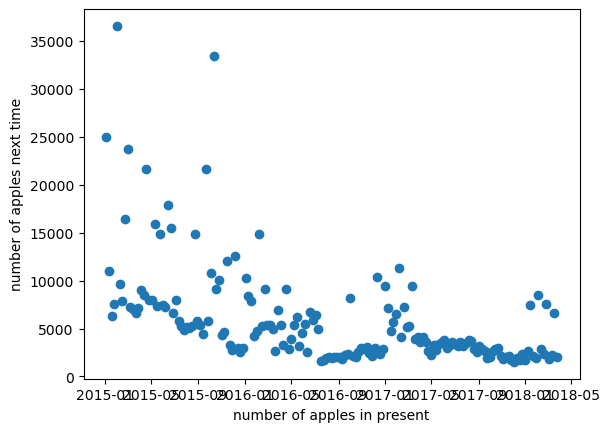

In [40]:
plt.scatter(df_fuji["Date"], df_fuji["Fuji"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.show()

In [41]:
df_fuji = df_fuji[df_fuji["Fuji"] <= 10000]

In [42]:
df_fuji["y"] = df_fuji["Fuji"].shift(-1)
df_fuji.dropna(inplace=True)
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 2 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    147 non-null    datetime64[ns]
 1   Fuji    147 non-null    int64         
 2   y       147 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 KB


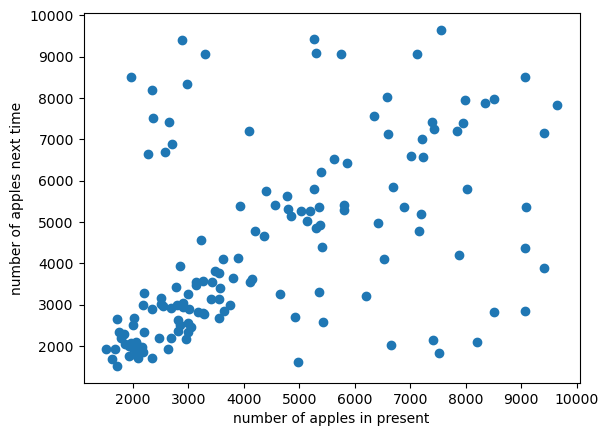

In [43]:
plt.scatter(df_fuji["Fuji"], df_fuji["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.show()

In [44]:
feature_fuji = np.array(df_fuji.drop(columns="y"))
label_fuji = np.array(df_fuji.drop(columns="Fuji"))

In [45]:
#Seed = 762701 with mean absolute error

In [46]:
feature_fuji_train, feature_fuji_test, label_fuji_train, label_fuji_test = train_test_split(feature_fuji, label_fuji, random_state=762701)

feature_fuji_train = np.array(sorted(feature_fuji_train, key=lambda x: x[0]))
feature_fuji_test = np.array(sorted(feature_fuji_test, key=lambda x: x[0]))
label_fuji_train = np.array(sorted(label_fuji_train, key=lambda x: x[0]))
label_fuji_test = np.array(sorted(label_fuji_test, key=lambda x: x[0]))

model = LinearRegression()
model.fit(feature_fuji_train[:, 1:], label_fuji_train[:, 1:])

LinearRegression()

Mean Absolute Error: 778.6392056999979
The Mean Square Error: 1012481.6940275069
The R2 score: 0.6000132408839973


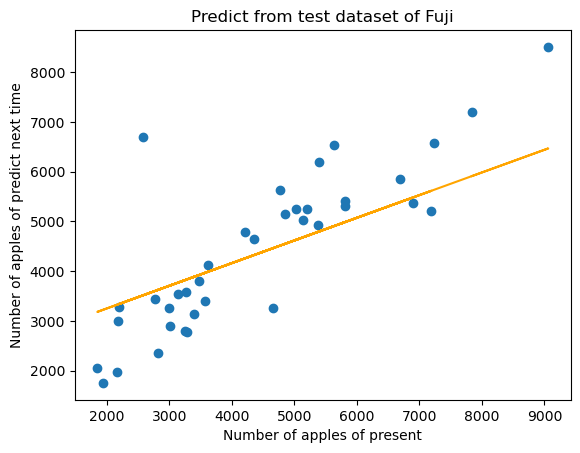

In [47]:
y_predict = model.predict(feature_fuji_test[:, 1:])
print(f"Mean Absolute Error: {mean_absolute_error(label_fuji_test[:, 1:], y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(label_fuji_test[:, 1:], y_predict)}")
print(f"The R2 score: {r2_score(label_fuji_test[:, 1:], y_predict)}")

plt.scatter(feature_fuji_test[:, 1:], label_fuji_test[:, 1:])
plt.plot(feature_fuji_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Fuji")
plt.show()

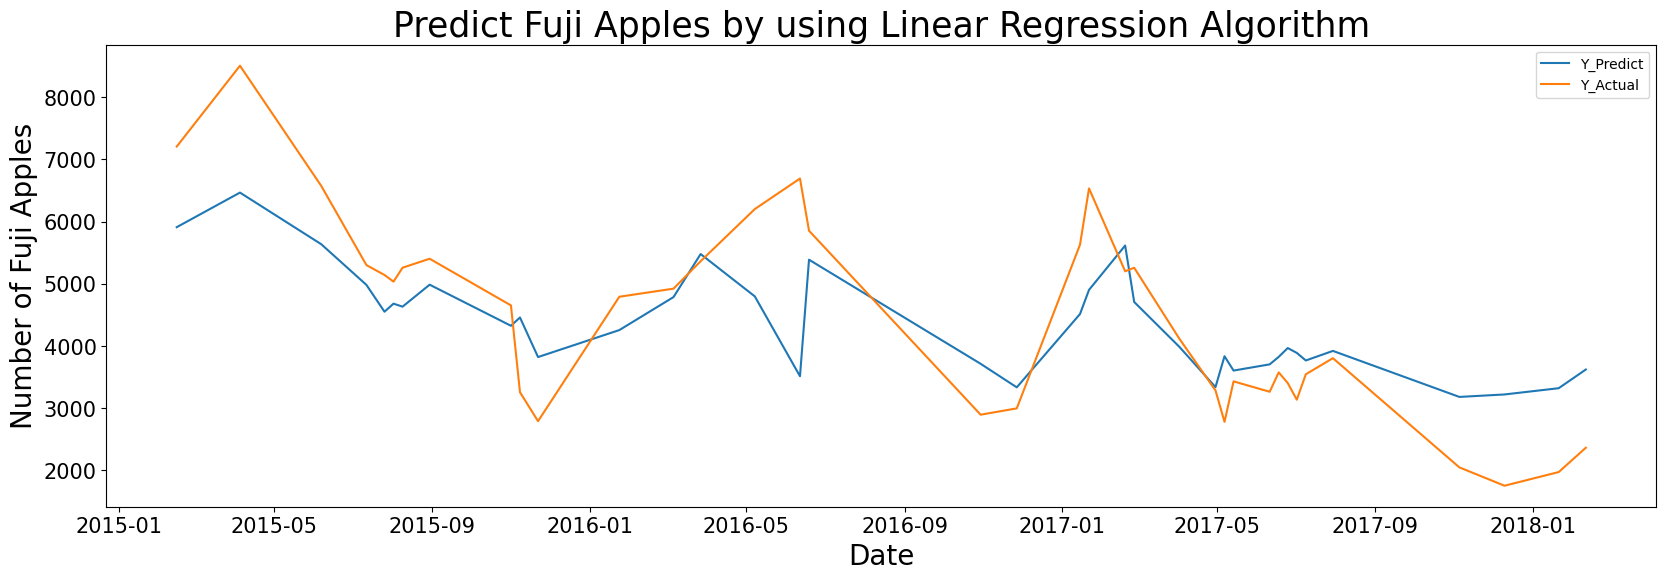

In [48]:
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(feature_fuji_test[:, :1], y_predict, label="Y_Predict")
plt.plot(feature_fuji_test[:,:1], label_fuji_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Fuji Apples", fontsize=20)
plt.title("Predict Fuji Apples by using Linear Regression Algorithm", fontsize=25)
plt.legend()
plt.show()

---